In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
df= pd.read_csv('F://bank.csv', delimiter=';')  # or use sep=';'

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# 1st check the data is balanced or imbalanced:
# % of no approx equals to % yes then it is balanced data

# 2nd. Is there any missing values..
# ---> assume that there are some missing values in loans.... it is categorical data--> so go with Logistic reg
# ---> assume that there are some missing values in balance.... it is Numerical data--> so go with reg
 # VIF
    
    # check sample is more than 1000 or not--> 
    # lets say if sample size is 5000 u randomly slt only 1000 samples
# 3rd. Multi co linearuty ----> VIF should be greater than 5.... if there is multi-colinearity use backward or forward
# (except nominal data use VIF)
# If VIF is less than 5



# feature--> what feature are imp..
# convert into dummies col


# 5th  applying PCA (optional)

# 6th building ML models...

# 7th Statistical Evaluation (confusuin matrix(precision recall, etc...), capa score--> imbalanced data set, ROC)

# 8th ---> Gain and lift chart(it is about targeting the audience.... lift >1(+ve corr)(check for +ve corr))

# for imbalanced data---> we have to do up or down sampling:

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [6]:
## the classification goal is to predict if the client will subscribe (Y/N) a term deposit (variable y)

In [7]:
data= df.copy()

In [8]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
# knowing the data:

In [10]:
df.shape

(4521, 17)

In [11]:
df.dtypes[df.dtypes=='object'].index

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [12]:
# before creating dummies check multi colinearity:

In [13]:
corr= df.corr()

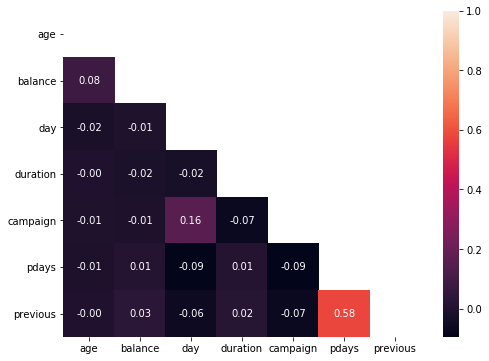

In [14]:
plt.figure(figsize=(8,6))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True
sns.heatmap(corr,annot=True,fmt='0.2f',mask=mask)

In [15]:
# before cal VIF we need to split the data
# while cal VIF there should be Numerical data
num_col= df.dtypes[df.dtypes=='int64'].index

In [16]:
X_num= df[num_col]

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
# VIF:
X_num.shape

(4521, 7)

In [19]:
vif= pd.DataFrame()
vif['Feature']= X_num.keys()
vif['VIF Score']= [variance_inflation_factor(X_num.values,i) for i in range(7)]

In [20]:
vif
# there is no multi-colonearity (coz, vif values is less than 5)

,Feature,VIF Score
0,age,5.092604
1,balance,1.231819
2,day,4.057535
3,duration,1.928720
4,campaign,1.830360
5,pdays,1.733904
6,previous,1.655651


In [21]:
# here create dummies:

In [22]:
df_dum= pd.get_dummies(df, drop_first=True)  #first--> is to get n-1 dummies

In [23]:
df_dum.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [24]:
# feature engg:
# spliting the data into ind and dep:

X= df_dum.iloc[:,:-1]
Y= df_dum.iloc[:,-1]

In [25]:
Y.value_counts()

0    4000
1     521
Name: y_yes, dtype: int64

In [26]:
# checking the data is imbalanced or not:
# based on % of classes we can say the data is imbalanced or balanced

# here 4000 is in clss 0 and 521 is in class 1

# clearly we can say the data is imbalanced


# # % on one clss is less than 20% it is imbalanced data...  for that we have bring upto 30-40% to get balanced data

In [27]:
import statsmodels.api as sm

In [28]:
model= sm.GLM(Y,X).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  y_yes   No. Observations:                 4521
Model:                            GLM   Df Residuals:                     4479
Model Family:                Gaussian   Df Model:                           41
Link Function:               identity   Scale:                        0.073097
Method:                          IRLS   Log-Likelihood:                -480.52
Date:                Thu, 10 Oct 2019   Deviance:                       327.40
Time:                        10:41:36   Pearson chi2:                     327.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                     0.0005    

In [29]:
features= model.pvalues.sort_values(ascending=True)
features[features<0.025]

duration            2.669761e-212
poutcome_success     3.859958e-55
month_oct            1.015051e-11
contact_unknown      1.990262e-08
month_mar            4.873139e-08
month_jan            5.431500e-04
day                  1.601168e-03
month_nov            2.399081e-03
month_jul            2.700422e-03
loan_yes             4.142675e-03
marital_married      6.180763e-03
poutcome_other       8.452288e-03
month_sep            8.965575e-03
job_retired          2.201513e-02
dtype: float64

In [30]:
selected_features= list(features[features<0.025].index) + ['y_yes']

**Selected Features**

In [31]:
print(selected_features)

['duration', 'poutcome_success', 'month_oct', 'contact_unknown', 'month_mar', 'month_jan', 'day', 'month_nov', 'month_jul', 'loan_yes', 'marital_married', 'poutcome_other', 'month_sep', 'job_retired', 'y_yes']


In [32]:
featured_data= df_dum[selected_features]

In [33]:
# save to csv:
featured_data.to_csv('F://Bank_featured.csv', index=False)

In [34]:
data= pd.read_csv('F://Bank_featured.csv')
data.head()

,duration,poutcome_success,month_oct,contact_unknown,month_mar,month_jan,day,month_nov,month_jul,loan_yes,marital_married,poutcome_other,month_sep,job_retired,y_yes
0,79,0,1,0,0,0,19,0,0,0,1,0,0,0,0
1,220,0,0,0,0,0,11,0,0,1,1,0,0,0,0
2,185,0,0,0,0,0,16,0,0,0,0,0,0,0,0
3,199,0,0,1,0,0,3,0,0,1,1,0,0,0,0
4,226,0,0,1,0,0,5,0,0,0,1,0,0,0,0


In [35]:
data['y_yes'].value_counts()#/len(data)

0    4000
1     521
Name: y_yes, dtype: int64

In [36]:
# split the data into 2 parts
# sample 0 and sample 1

data_no= data[data['y_yes']==0]
data_yes= data[data['y_yes']==1]

In [37]:
from sklearn.utils import resample
#notes

In [38]:
data_yes_resample= resample(data_yes,replace=True,n_samples=2000)

In [39]:
data_yes_resample.shape

(2000, 15)

In [40]:
data.head()

,duration,poutcome_success,month_oct,contact_unknown,month_mar,month_jan,day,month_nov,month_jul,loan_yes,marital_married,poutcome_other,month_sep,job_retired,y_yes
0,79,0,1,0,0,0,19,0,0,0,1,0,0,0,0
1,220,0,0,0,0,0,11,0,0,1,1,0,0,0,0
2,185,0,0,0,0,0,16,0,0,0,0,0,0,0,0
3,199,0,0,1,0,0,3,0,0,1,1,0,0,0,0
4,226,0,0,1,0,0,5,0,0,0,1,0,0,0,0


In [41]:
data_resample=pd.concat((data_no,data_yes_resample),axis=0)

In [42]:
data_resample

,duration,poutcome_success,month_oct,contact_unknown,month_mar,month_jan,day,month_nov,month_jul,loan_yes,marital_married,poutcome_other,month_sep,job_retired,y_yes
0,79,0,1,0,0,0,19,0,0,0,1,0,0,0,0
1,220,0,0,0,0,0,11,0,0,1,1,0,0,0,0
2,185,0,0,0,0,0,16,0,0,0,0,0,0,0,0
3,199,0,0,1,0,0,3,0,0,1,1,0,0,0,0
4,226,0,0,1,0,0,5,0,0,0,1,0,0,0,0
5,141,0,0,0,0,0,23,0,0,0,0,0,0,0,0
6,341,0,0,0,0,0,14,0,0,0,1,1,0,0,0
7,151,0,0,0,0,0,6,0,0,0,1,0,0,0,0
8,57,0,0,1,0,0,14,0,0,0,1,0,0,0,0
9,313,0,0,0,0,0,17,0,0,1,1,0,0,0,0


In [43]:
#here we done Up sampling:

In [44]:
data_resample['y_yes'].value_counts()

0    4000
1    2000
Name: y_yes, dtype: int64

In [45]:
# save to csv:
#data_resample.to_csv('F://Bank_resampl.csv', index=False)

In [46]:
#split the data INd and Dep

In [47]:
X1= data_resample.iloc[:,:-1]  # IND
Y1= data_resample.iloc[:,-1]  # dep

In [48]:
#spliting into training and testing:
np.random.seed(1001)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X1,Y1,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4200, 14), (1800, 14), (4200,), (1800,))

**Building the ML model**

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
from sklearn.linear_model import LogisticRegression
model1= LogisticRegression()
model1.fit(x_train,y_train)#---> Training

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
model1.intercept_, model1.coef_

(array([-2.06240232]),
 array([[ 4.78039197e-03,  2.43789811e+00,  1.88852981e+00,
         -1.48732465e+00,  1.96973730e+00, -6.50622836e-01,
          1.74674669e-03, -3.32060039e-01, -7.11477296e-01,
         -7.41041101e-01, -3.76480589e-01,  5.11011825e-01,
          9.23107842e-01,  7.69541656e-01]]))

**MLE(MAXIMUM LIKELIHOOD ESTIMATION)**

In [52]:
#training data:

y_pred_train= model1.predict_proba(x_train)
y_pred_train_1= y_pred_train[:,1]

Threshold Probability Value= 0.42424242424242425


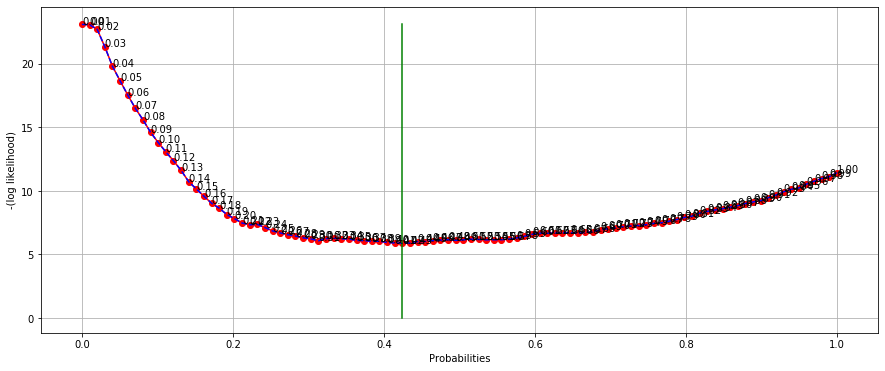

In [53]:
from sklearn.metrics import log_loss  #log loss
class threshold():
        def __init__(self):
            self.th=0.5
        def predict_threshold(self,Y1):
            if Y1>= self.th:
                return 1
            else:
                return 0
y_pred_train_prob_1= y_pred_train_1
probabilities=np.linspace(0,1,num=100)
pre = threshold()
mle=[]
for p in probabilities:
    pre.th= p
    yy=pd.Series(y_pred_train_prob_1)
    y_pred_0_5 = yy.apply(pre.predict_threshold)
    loss= log_loss(y_train,y_pred_0_5)
    mle.append(loss)
#visualize:
plt.figure(figsize=(15,6))
plt.plot(probabilities,mle,'ro-')
plt.plot(probabilities,mle,'b--')
ind= np.array(mle).argmin()
mx= max(mle)
val= probabilities[ind]

print('Threshold Probability Value=',val)

plt.plot([val,val],[0,mx],'g')


for i,p in enumerate(probabilities):
    plt.text(probabilities[i],mle[i],'%0.2f'%(p))

#plt.figure(figsize=(10,4))
sns.scatterplot(x=probabilities,y=mle)
plt.xlabel('Probabilities')
plt.ylabel('-(log likelihood)')
plt.grid()
plt.show()

**APPLY TO TEST DATA:**

In [55]:
y_pred_prob_test= model1.predict_proba(x_test)
y_pred_prob_test_1= y_pred_prob_test[:,1]

In [56]:
pre= threshold()
threh_prob= 0.4748  # from MLE
pre.th=threh_prob # selecting threshold
yy=pd.Series(y_pred_prob_test_1)# Converting prob array into series
y_pred_class_test = yy.apply(pre.predict_threshold) # apply predictive class

# Statistical Evaluation:

In [57]:
!pip install pandas_ml

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

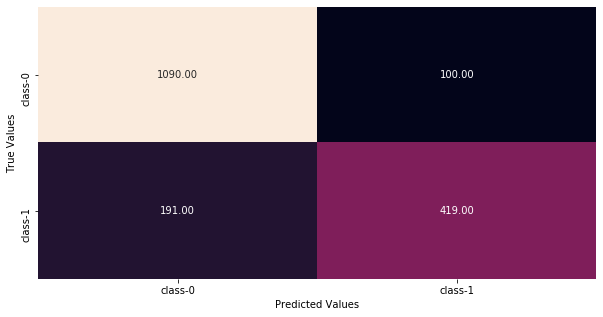

In [59]:
cm= confusion_matrix(y_test,y_pred_class_test)
plt.figure(figsize=(10,5))

sns.heatmap(cm,annot=True,fmt='0.2f',xticklabels=['class-0','class-1'],yticklabels=['class-0','class-1'], cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [60]:
cr= classification_report(y_test,y_pred_class_test)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1190
           1       0.81      0.69      0.74       610

    accuracy                           0.84      1800
   macro avg       0.83      0.80      0.81      1800
weighted avg       0.84      0.84      0.83      1800



In [61]:
from sklearn.metrics import cohen_kappa_score

In [62]:
cohen_kappa_score(y_test,y_pred_class_test) # model is good

# kappa score should be more than 50%... if not reject the model

0.625595059398722

In [65]:
ra= (1190/1800)*(1092/1800) + (610/1800)*(419/1800)
acc=(1092+419) / 1800
ra,acc

(0.4799598765432099, 0.8394444444444444)

In [66]:
kappa= (acc-ra)/(1-ra)
kappa

0.69126313852801

### ROC and AUC (Training data)
#### - ROC: Receiver operating characteristic
#### - AUC: Area Under curve.

In [67]:
from sklearn.metrics import roc_curve,auc

In [70]:
y_pred_train_prob= model1.predict_proba(x_train)
y_pred_train_prob1= y_pred_train_prob[:,1]

In [71]:
fpr, tpr,proba= roc_curve(y_train,y_pred_train_prob1)

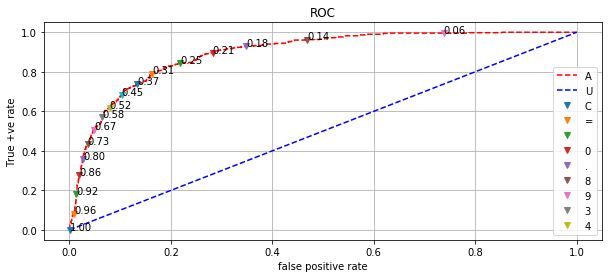

In [74]:
plt.figure(figsize=(10,4))
plt.plot(fpr,tpr,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(proba)):
    if i%50==1: #displaying for every 5th value
        plt.plot (fpr[i],tpr[i],'v')
        plt.text(fpr[i],tpr[i],'%0.2f'%proba[i])
plt.xlabel('false positive rate')
plt.ylabel('True +ve rate')
plt.title('ROC')
area= auc(fpr,tpr)
plt.legend('AUC= %0.4F'%area)
plt.grid()

In [75]:
auc(fpr,tpr)

0.8934336516551884

In [76]:
pre= threshold() # predictor class
threh_prob= 0.3 # from ROC
pre.th=threh_prob #selecting threshold
yy=pd.Series(y_pred_train_prob1)# Converting prob array into series
y_pred_class_train = yy.apply(pre.predict_threshold) # apply predictive class

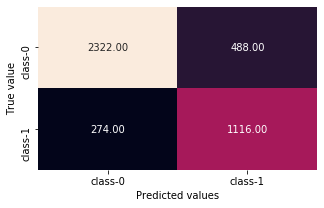

In [77]:
cm= confusion_matrix(y_train,y_pred_class_train)
plt.figure(figsize=(5,3))

sns.heatmap(cm,annot=True,fmt='0.2f',xticklabels=['class-0','class-1'],yticklabels=['class-0','class-1'],cbar=False)

plt.xlabel('Predicted values')
plt.ylabel('True value')
plt.show()

In [78]:
cr= classification_report(y_train, y_pred_class_train)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      2810
           1       0.70      0.80      0.75      1390

    accuracy                           0.82      4200
   macro avg       0.80      0.81      0.80      4200
weighted avg       0.83      0.82      0.82      4200



In [79]:
cohen_kappa_score(y_train, y_pred_class_train)

0.605652268201802

## PCA( Principal Component directions)

In [80]:
# Matrix tranformation on a vector:

#notes: